# Time Series

Simply put, a time series is any data put into chronological order.  Time Series Analysis therefore is simply an analysis of how a subject has behaved over time.

In [1]:
# The built-in Nile object is a dataset recording the measurements of the annual flow of the Nile river.
# It's class is "ts," for time series.
# Using the print() function on a time series object,
# we can examine the start date, and end date, as well as the measurements.
print(Nile)

Time Series:
Start = 1871 
End = 1970 
Frequency = 1 
  [1] 1120 1160  963 1210 1160 1160  813 1230 1370 1140  995  935 1110  994 1020
 [16]  960 1180  799  958 1140 1100 1210 1150 1250 1260 1220 1030 1100  774  840
 [31]  874  694  940  833  701  916  692 1020 1050  969  831  726  456  824  702
 [46] 1120 1100  832  764  821  768  845  864  862  698  845  744  796 1040  759
 [61]  781  865  845  944  984  897  822 1010  771  676  649  846  812  742  801
 [76] 1040  860  874  848  890  744  749  838 1050  918  986  797  923  975  815
 [91] 1020  906  901 1170  912  746  919  718  714  740


In [2]:
# Similarly to dataframes, we can view other metadata about this time series
length(Nile)
head(Nile, 5)
tail(Nile, 5)

# Right off the bat, we can already see that the last few values are much less than the first few.

[1] 100

[1] 1120 1160  963 1210 1160

[1] 746 919 718 714 740

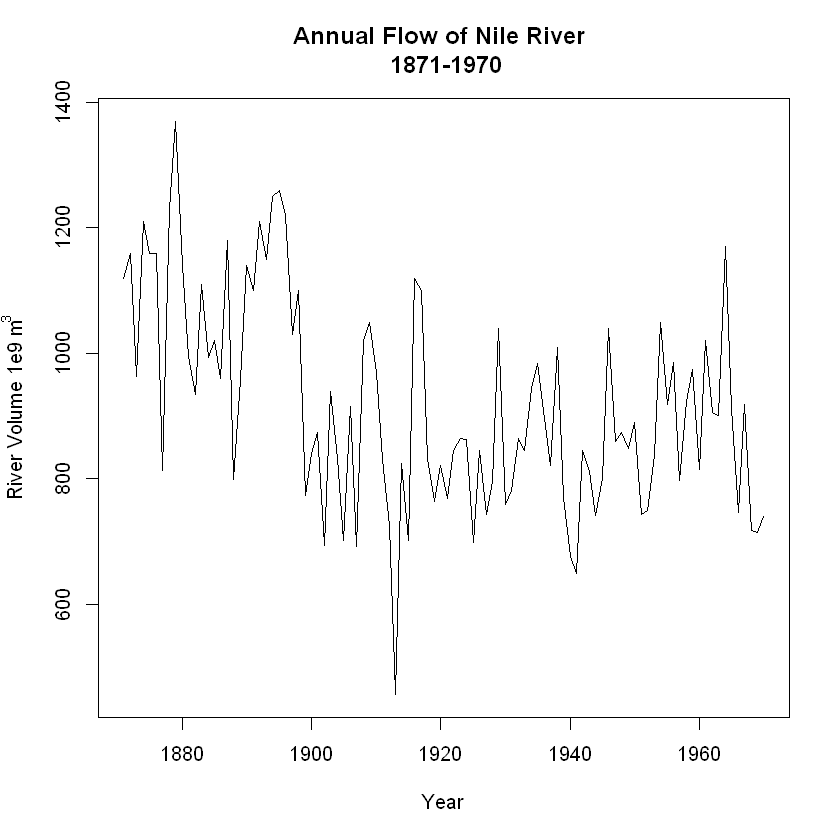

In [3]:
# Is it also useful to visualize your time series before digging any deeper.
plot(Nile, xlab="Year", ylab= expression('River Volume 1e9 m'^3) , main="Annual Flow of Nile River \n 1871-1970")